<a href="https://colab.research.google.com/github/NeatyNut/AIFFEL_Online_Quest/blob/main/Main_Quest/CNN_main_quest_new_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 2-2) 미니 프로젝트 : 가위바위 분류기 만들기(새 버전)
1. 데이터 준비
2. 딥러닝 네트워크 설계
3. 딥러닝 네트워크 학습
4. 딥러닝 모델 평가
5. 딥러닝 모델 개선

- 학습 데이터 : 강영현/김민기/김승순/김양희/오우진/윤혜윤/이상원/이슬/이승환/조보겸/조수민/최강훈/한현종/홍채림

    <u>[전민규, 이선재 님 제외]</u> 님 사진

- 테스트 데이터 : 이선재 님 사진

  why : 단일 개수 최다 및 다양한 시도

* ★ 이미지 데이터는 편의상 로컬에서 가공해왔습니다

In [ ]:
# 압축풀기

import zipfile

with zipfile.ZipFile('sample_data/rock_scissor_paper_train.zip', 'r') as zip_ref:
    zip_ref.extractall('/content/sample_data/rock_scissor_paper_train')


with zipfile.ZipFile('sample_data/rock_scissor_paper_test.zip', 'r') as zip_ref:
    zip_ref.extractall('/content/sample_data/rock_scissor_paper_test')

In [ ]:
paper_train_path = '/content/sample_data/rock_scissor_paper_train/paper'
rock_train_path = '/content/sample_data/rock_scissor_paper_train/rock'
scissor_train_path = '/content/sample_data/rock_scissor_paper_train/scissor'

paper_test_path = '/content/sample_data/rock_scissor_paper_test/paper'
rock_test_path = '/content/sample_data/rock_scissor_paper_test/rock'
scissor_test_path = '/content/sample_data/rock_scissor_paper_test/scissor'

In [ ]:
# 이미지 크기 확인

import os
os.listdir(paper_train_path)[0]
image_path = os.path.join(paper_train_path, os.listdir(paper_train_path)[0])

from PIL import Image
import numpy as np

pil_img = Image.open(image_path)
im = np.array(pil_img)
im.shape

(28, 28, 3)

In [ ]:
train_count = len(os.listdir(paper_train_path)) + len(os.listdir(scissor_train_path)) + len(os.listdir(rock_train_path))
test_count = len(os.listdir(paper_test_path)) + len(os.listdir(scissor_test_path)) + len(os.listdir(rock_test_path))

print("훈련 데이터 개수는", train_count)
print("테스트 데이터 개수는", test_count)

훈련 데이터 개수는 4286
테스트 데이터 개수는 753


In [ ]:
import numpy as np
import glob
from PIL import Image

def load_data(img_path, number_of_data=300):  # 가위바위보 이미지 개수 총합에 주의하세요.
    # 가위 : 0, 바위 : 1, 보 : 2
    img_size=28
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1

    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1

    print("학습데이터(x_train)의 이미지 개수는", idx,"입니다.")
    return imgs, labels

In [ ]:
image_dir_path = '/content/sample_data/rock_scissor_paper_train'
(x_train, y_train)=load_data(image_dir_path, train_count)
x_train_norm = x_train/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_train shape: {}".format(x_train.shape))
print("y_train shape: {}".format(y_train.shape))

학습데이터(x_train)의 이미지 개수는 4286 입니다.
x_train shape: (4286, 28, 28, 3)
y_train shape: (4286,)


In [ ]:
image_dir_path = '/content/sample_data/rock_scissor_paper_test'
(x_test, y_test)=load_data(image_dir_path, test_count)
x_test_norm = x_test/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_test shape: {}".format(x_test.shape))
print("y_test shape: {}".format(y_test.shape))

학습데이터(x_train)의 이미지 개수는 753 입니다.
x_test shape: (753, 28, 28, 3)
y_test shape: (753,)


In [ ]:
import tensorflow as tf
from tensorflow import keras

# n_channel_1=[32, 64, 128, 256]
# n_channel_2=[32, 64, 128, 256]
# n_dense_1=[32, 64, 128, 256]
# n_dense_2=[32, 64, 128, 256]
# n_dense_3=[32, 64, 128, 256]
# n_dense_4=[32, 64, 128, 256]

# n_train_epoch=[50, 100, 150]
# n_dropout_rate = [0.01, 0.05, 0.1]
# n_learning_rate = [0.001, 0.01, 0.1, 0.5]


# import random

# n1 = random.randint(0, 3)
# n2 = random.randint(0, 3)

# n3 = random.randint(0, 3)
# n4 = random.randint(0, 3)
# n5 = random.randint(0, 3)
# n6 = random.randint(0, 3)

# n7 = random.randint(0, 2)
# n8 = random.randint(0, 2)
# n9 = random.randint(0, 3)

model=keras.models.Sequential()
model.add(keras.layers.Conv2D(64, (2,2), activation='relu', input_shape=(28,28,3)))
model.add(keras.layers.Conv2D(128, (10,10), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Conv2D(64, (2,2)))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(256, activation='relu'))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(3, activation='softmax'))

model.summary()
model.compile(optimizer='adam',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])

# 모델 훈련
# model.optimizer.learning_rate = 0.5
history = model.fit(x_train_norm, y_train, epochs=10)

# 모델 시험
test_loss, test_accuracy = model.evaluate(x_test_norm, y_test, verbose=2)
# print(f"n_channel_1 : {n_channel_1[n1]}, n_channel_2 : {n_channel_1[n2]}, n_dense_1 : {n_dense_1[n3]}, n_dense_2 : {n_dense_2[n4]}, n_dense_3 : {n_dense_3[n5]}, n_dense_4 : {n_dense_4[n6]}, n_train_epoch : {n_train_epoch[n7]}, n_dropout_rate : {n_dropout_rate[n8]}, n_learning_rate : {n_learning_rate[n9]}")
print(f"test_loss: {test_loss} ")
print(f"test_accuracy: {test_accuracy}")

Model: "sequential_27"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_62 (Conv2D)          (None, 27, 27, 64)        832       
                                                                 
 conv2d_63 (Conv2D)          (None, 18, 18, 128)       819328    
                                                                 
 max_pooling2d_49 (MaxPooli  (None, 9, 9, 128)         0         
 ng2D)                                                           
                                                                 
 conv2d_64 (Conv2D)          (None, 8, 8, 64)          32832     
                                                                 
 max_pooling2d_50 (MaxPooli  (None, 4, 4, 64)          0         
 ng2D)                                                           
                                                                 
 flatten_27 (Flatten)        (None, 1024)            

---
n_channel_1 : 32, n_channel_2 : 128, n_dense_1 : 32, n_dense_2 : 64, n_dense_3 : 32, n_dense_4 : 32, n_train_epoch : 20, n_dropout_rate : 0.1, n_learning_rate : 0.01

test_loss: 1.101427435874939

test_accuracy: 0.32270917296409607

---
n_channel_1 : 64, n_channel_2 : 256, n_dense_1 : 64, n_dense_2 : 32, n_dense_3 : 256, n_dense_4 : 64, n_train_epoch : 100, n_dropout_rate : 0.1, n_learning_rate : 0.5

test_loss: 1.0982557535171509

test_accuracy: 0.35458168387413025

---
n_channel_1 : 256, n_channel_2 : 256, n_dense_1 : 256, n_dense_2 : 256, n_dense_3 : 32, n_dense_4 : 64, n_train_epoch : 50, n_dropout_rate : 0.005, n_learning_rate : 0.001

test_loss: 12.72536849975586

test_accuracy: 0.4608233869075775

---
n_channel_1 : 64, n_channel_2 : 32, n_dense_1 : 32, n_dense_2 : 32, n_dense_3 : 256, n_dense_4 : 256, n_train_epoch : 150, n_dropout_rate : 0.05,

n_learning_rate : 0.001

test_loss: 7.66087007522583

test_accuracy: 0.4780876636505127

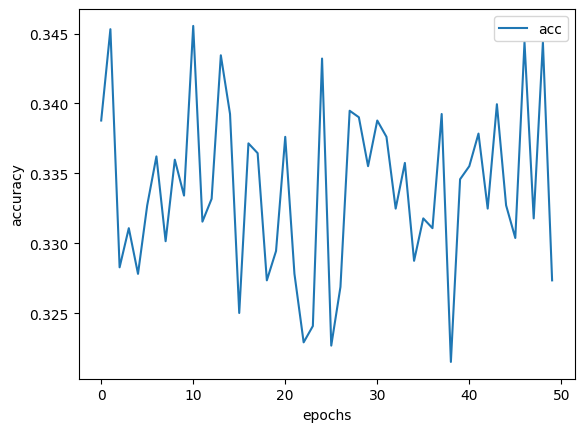

In [ ]:
import matplotlib.pyplot as plt

def analyze_model_performance(history):
    # 학습 손실, 학습 정확도, 검증 손실, 검증 정확도 추출
    train_loss = history.history['loss']
    train_accuracy = history.history['accuracy']
    val_loss = history.history['val_loss']
    val_accuracy = history.history['val_accuracy']

plt.plot(history.history['accuracy'], label='acc')
# plt.plot(history.history['loss'], label='loss')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()